# Menyimpan Model Scikit-Learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Datasets/iris.csv')

dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
label = dataset['Species']
feature = dataset.drop(['Id', 'Species'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(feature)

feature_scaled = scaler.transform(feature)
data_feature = pd.DataFrame(feature_scaled, columns=feature.columns)

In [ ]:
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(data_feature, label, test_size=0.15)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score

# Object model : `logreg`

In [ ]:
logreg = LogisticRegression()
logreg.fit(feature_train, label_train)
label_pred = logreg.predict(feature_test)

In [ ]:
print('Accuracy of logistic regressin classifier on test set: {:.2f}'.format(logreg.score(feature_test, label_test)))
print("F1 score: ", f1_score(label_test, label_pred, average='macro'))
print("Precision score: ", precision_score(label_test, label_pred, average='macro'))
print("Recall score: ", recall_score(label_test, label_pred, average='macro'))

Accuracy of logistic regressin classifier on test set: 0.96
F1 score:  0.9581699346405229
Precision score:  0.9629629629629629
Recall score:  0.9583333333333334


# Save model hasil training

In [ ]:
import pickle

In [ ]:
filename = 'model.pickle'
pickle.dump(logreg, open(filename, 'wb'))

scalername = 'scaler.pickle'
pickle.dump(scaler, open(scalername, 'wb'))

# Loading model hasil training

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
label_pred_loaded = loaded_model.predict(feature_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(loaded_model.score(feature_test, label_test))) 
print('F1 score: ', f1_score(label_test, label_pred_loaded, average='macro'))
print('Precision score: ', precision_score(label_test, label_pred_loaded, average='macro'))
print('Recall score: ', recall_score(label_test, label_pred_loaded, average='macro'))

Accuracy of logistic regression classifier on test set: 0.96
F1 score:  0.9581699346405229
Precision score:  0.9629629629629629
Recall score:  0.9583333333333334


In [ ]:
feature_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
99,-0.173674,-0.587764,0.194102,0.133226
49,-1.021849,0.569251,-1.341272,-1.312977
108,1.038005,-1.281972,1.160819,0.790591
136,0.553333,0.800654,1.047087,1.579429
107,1.765012,-0.356361,1.445147,0.790591
5,-0.537178,1.957669,-1.170675,-1.050031
55,-0.173674,-0.587764,0.421564,0.133226
143,1.159173,0.337848,1.217684,1.447956
84,-0.537178,-0.124958,0.421564,0.396172
102,1.522676,-0.124958,1.217684,1.185010


# Contoh prediksi data tunggal

In [ ]:
test_data = [[-1.264185,	-0.124958,	-1.341272,	-1.444450]] # Dari row 12

prediction_example = loaded_model.predict(test_data)

prediction_example[0]

'Iris-setosa'

In [ ]:
# Cek scaler.pickle
iris = [[5.1, 3.5, 1.4, 0.2]]
iris1 = [[4.9,	3.0,	1.4,	0.2]]

loaded_scaler = pickle.load(open(scalername, 'rb'))

iris_transform = loaded_scaler.transform(iris1)
iris_transform

prediction_example = loaded_model.predict(iris_transform)

prediction_example[0]


'Iris-setosa'

# Contoh prediksi data batch

In [ ]:
test_data_batch = [
               [1.401508,	0.337848,	0.535296,	0.264699],
               [-0.294842,	-0.124958,	0.421564,	0.396172],
               [0.068662,	-0.124958,	0.762759,	0.790591],
               [-0.294842,	-0.356361,	-0.090227,	0.133226]
               ] # Dari row 50, 66, 149, 64

prediction_example = loaded_model.predict(test_data_batch)

for i in range(len(test_data_batch)):
  print("Test data=%s, Predicted=%s" % (test_data_batch[i], prediction_example[i]))
    # print('Test data={}, Predicted={}'.format(test_data_batch[i], prediction_example[i]))

Test data=[1.401508, 0.337848, 0.535296, 0.264699], Predicted=Iris-versicolor
Test data=[-0.294842, -0.124958, 0.421564, 0.396172], Predicted=Iris-versicolor
Test data=[0.068662, -0.124958, 0.762759, 0.790591], Predicted=Iris-virginica
Test data=[-0.294842, -0.356361, -0.090227, 0.133226], Predicted=Iris-versicolor


# JSON



```
Data dari data awal row 1
{
  "sepal_length": 5.1,
  "sepal_width": 3.5,
  "petal_length": 1.4,
  "petal_width": 0.2

}

```



# Implementasi di Python

In [ ]:
!pip install flask-ngrok

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask

In [ ]:
app = Flask(__name__)

@app.route("/home")
def home():
  return "<h1>Running Flask on Google Colab!</h1>"

In [ ]:
from flask import jsonify, request

In [ ]:
@app.route('/classify', methods=['POST'])
def classification():
  sepal_length = float(request.json['sepal_length'])
  sepal_width = float(request.json['sepal_width'])
  petal_length = float(request.json['petal_length'])
  petal_width =  float(request.json['petal_width'])

  test_data = [[sepal_length, sepal_width, petal_length, petal_width]]

  # loaded_scaler = pickle.load(open(scalername, 'rb'))

  test_data_scaled = loaded_scaler.transform(test_data)

  prediction_example = loaded_model.predict(test_data_scaled)

  return jsonify({
      "output": prediction_example[0]
  })

In [ ]:
run_with_ngrok(app)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://e9ded020268d.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [06/Oct/2020 11:48:18] "POST /classify HTTP/1.1" 200 -


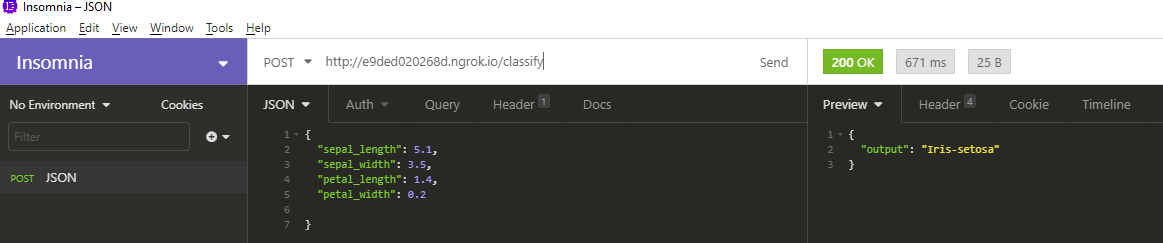

Data test yang digunakan berasal dari feature_test, jadi untuk penentuan hasil prediksinya lebih mudah